# What features are correlated with Prosper Rating?
## by Kexin Fu

## Investigation Overview

> 探讨Prosper Rating的相关因素。

## Dataset Overview

> There are 113937 loan entries in the dataset with 81 features. Most variables are numeric in nature, but the variables CreditGrade,ProsperRating (Alpha),EmploymentStatus, IncomeRange are ordered factor variables with the following levels.

ProsperRating (numeric)	The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
ProsperRating (Alpha)	The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')
# convert CreditGrade, ProsperRating (Alpha), and IncomeRange into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['NC','HR','E','D','C','B','A','AA'],
                    'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
                    'IncomeRange': ['$0','Not employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Prosper Rating (Numeric), Prosper Score

>ProsperRating分布较为集中在4-7区间内；ProsperScore分布较为集中为4-9之间,粗略成正态分布。

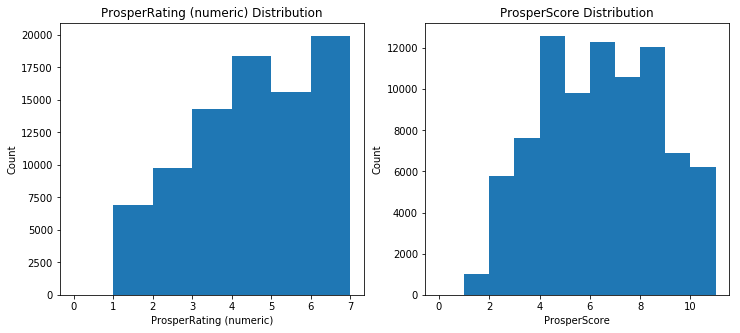

In [6]:
plt.figure(figsize=[12, 5])
plt.subplot(1,2,1)
binsize = 1
bins = np.arange(0, df['ProsperRating (numeric)'].max()+binsize, binsize)
plt.hist(data = df, x = 'ProsperRating (numeric)', bins = bins)
plt.xlabel('ProsperRating (numeric)')
plt.ylabel('Count')
plt.title('ProsperRating (numeric) Distribution')

plt.subplot(1,2,2)
binsize = 1
bins = np.arange(0, df['ProsperScore'].max()+binsize, binsize)
plt.hist(data = df, x = 'ProsperScore', bins = bins)
plt.xlabel('ProsperScore')
plt.ylabel('Count')
plt.title('ProsperScore Distribution')
plt.show()

## Distribution of Prosper Rating (Alpha)

> ProsperRating(Alpha)集中在C附近，粗略为正态分布。

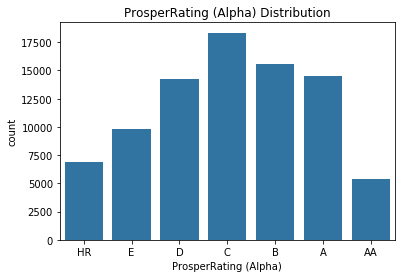

In [5]:
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = default_color)
plt.title('ProsperRating (Alpha) Distribution')
plt.show()

## Prosper Rating (Numeric) vs. Numeric Features

热图观察可见，Prosper Rating和BorrowerRate有极强负相关性，Borrower Rate越高，Prosper Rate越低，反之亦然。Prosper Rating和ProsperScore，Credit Score Range表现出较强的正相关性。但是CurrentDelinquencies
AmountDelinquent,DelinquenciesLast7years却都未和Prosper Rating表现出相关性，这也有些出乎意料。

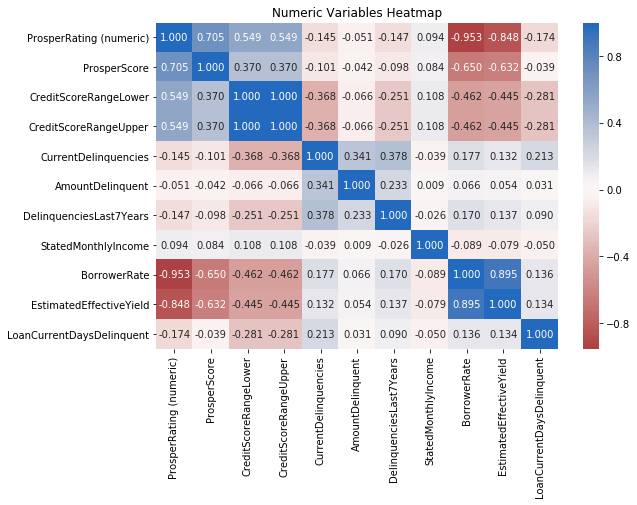

In [7]:
numeric_vars = ['ProsperRating (numeric)','ProsperScore','CreditScoreRangeLower','CreditScoreRangeUpper','CurrentDelinquencies','AmountDelinquent', 'DelinquenciesLast7Years','StatedMonthlyIncome','BorrowerRate','EstimatedEffectiveYield','LoanCurrentDaysDelinquent']
plt.figure(figsize = [9, 6])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title('Numeric Variables Heatmap')
plt.show()

## Prosper Rating (Numeric) vs. Categorical Features

### 1. 分类Boxplot分析

箱线图表明，Part-time群体的BorrowerRate中位数最低，相对应的ProsperRating中位数最高。Not employed和other群体的Propser Rating中位数最低，并且BorrowerRate最高。
LoanStatus来看，Chargedoff群体的BorrowerRate最高，ProsperRating最低。总体来说，逾期未还的比其他情况ProsperRating低，并且BorrowerRate更高。
收入的总体趋势表明，收入越高，BorrowerRate越低，并且ProsperRating也越高。

<Figure size 720x720 with 0 Axes>

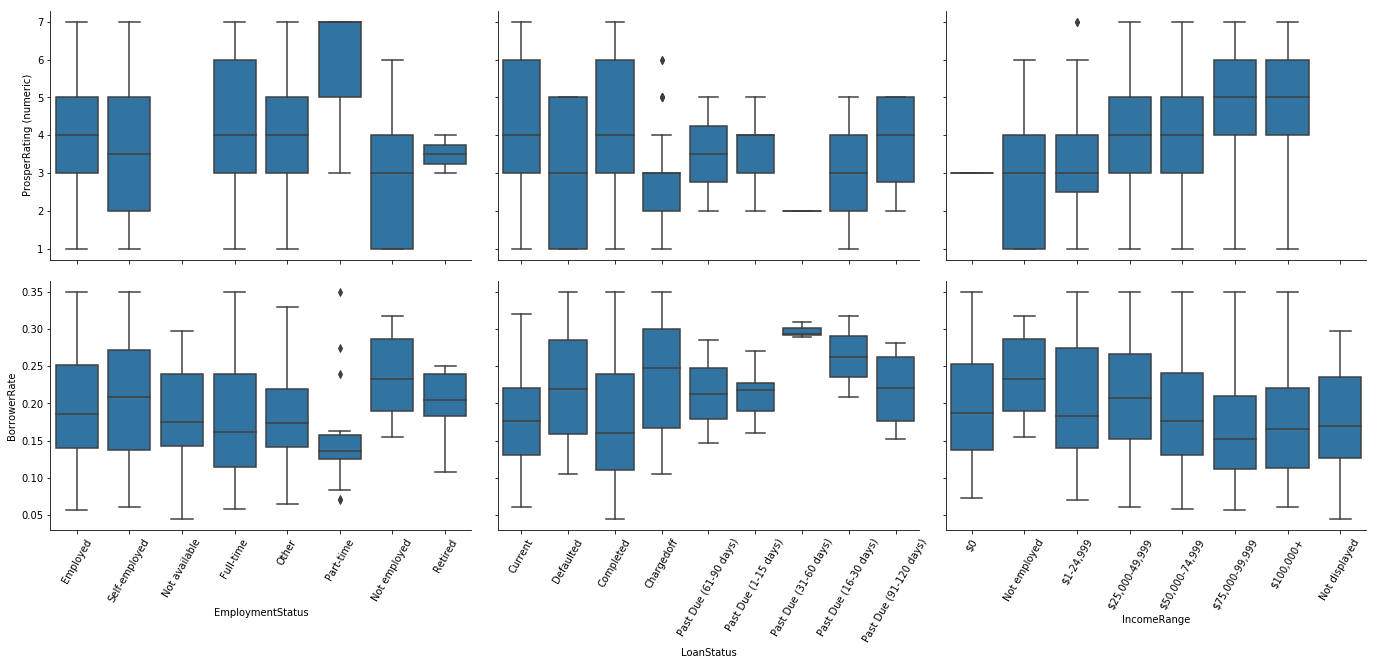

In [10]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_vars = [ 'EmploymentStatus', 'LoanStatus','IncomeRange']
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=60)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['ProsperRating (numeric)','BorrowerRate'], x_vars = categoric_vars,
                size = 4, aspect = 1.6)
g.map(boxgrid)
plt.show()

### 2. 分类Countplot分析

由分类countplot可见：
就EmploymentStatus来看，Self-employed,employed,full-time和other群体C信用评级最多。
就IncomeRange来看，信用评级越低，高收入群体比例也随之减少。
就LoanStatus来看，信用评级越低的群体，都有很高比例的Defaulted和Chargedoff贷款。

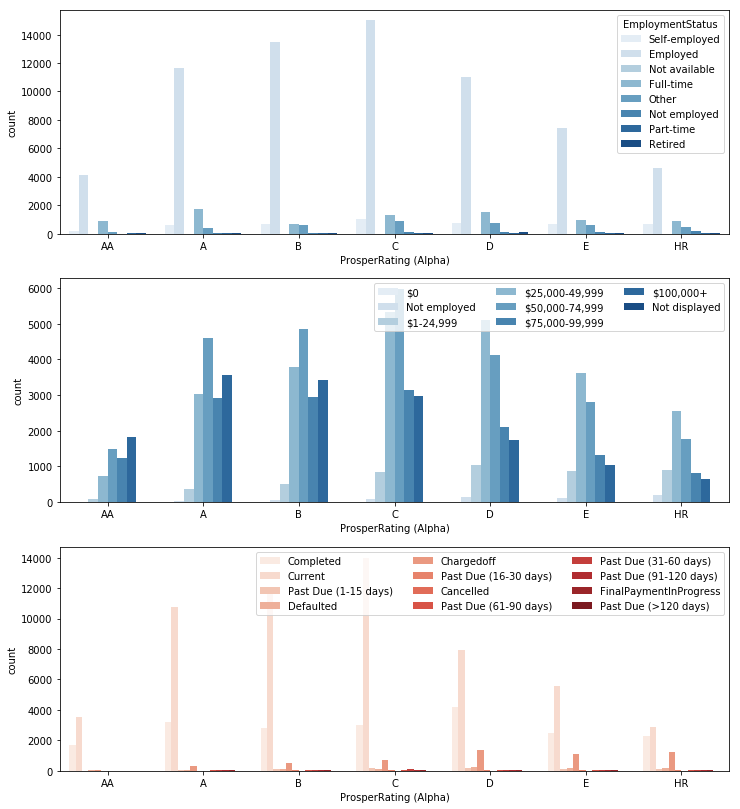

In [12]:
plt.figure(figsize = [12, 14])

# subplot 1: 
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Blues')

# subplot 2: 
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'IncomeRange', palette = 'Blues')
ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# subplot 3:
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'LoanStatus', palette = 'Reds')
ax.legend(loc = 1, ncol = 3) # re-arrange legend to remove overlapping
plt.show()

## Prosper Rating (Numeric)  and Delinquencies

由分面图可见，PropserRating为E和D的，存在大量CurrentDelinquencies和AmountDelinquent。评级为AA的CurrentDelinquencies和AmountDelinquent最少。而评级为A的，同样存在部分有大额AmountDelinquent和CurrentDelinquencies的。

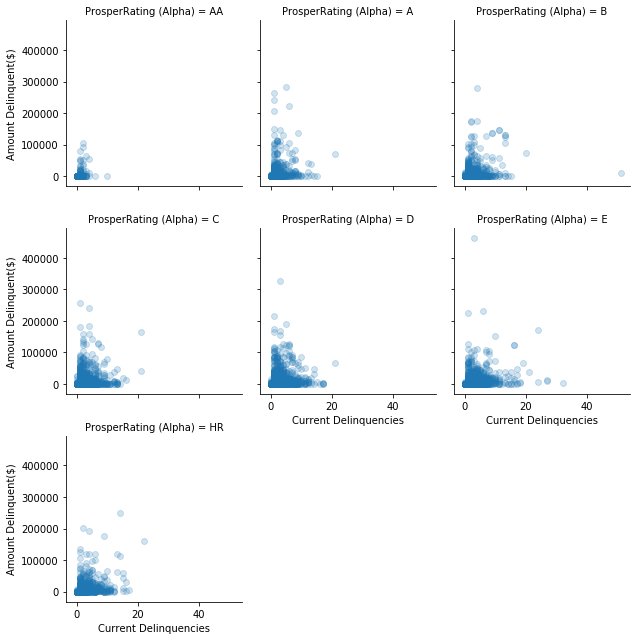

In [17]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', col_wrap = 3, size = 3)
g.map(plt.scatter, 'CurrentDelinquencies', 'AmountDelinquent',alpha=0.2)
g.set_xlabels('Current Delinquencies')
g.set_ylabels('Amount Delinquent($)')
plt.show()

# Prosper Rating(Alpha) vs. Borrower Rate vs. Loan Original Amount

由图可见明显的分层，ProsperRating级别越低，贷款原金额相应越小，贷款利率越高；繁殖ProsperRating级别越高，贷款原始金额也被允许更高，贷款利率也越低。

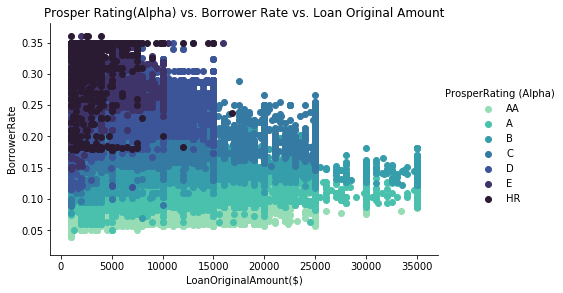

In [4]:
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'][::-1]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', size = 4,
                 palette = 'mako_r',aspect=1.6)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
plt.xlabel('LoanOriginalAmount($)')
plt.title('Prosper Rating(Alpha) vs. Borrower Rate vs. Loan Original Amount')
g.add_legend()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!